## SEB DATA CHALLENGE
### BY KATARZYNA SOSNOWSKA
First part of SEB DATA CHALLENGE is to explore the data and extract insights about the customers. Firstly, I check data quality: handle missing values and wrong values (e.g. inconsistent naming in categorical variables or date of birth suggesting active, 200-years-old customer). Secondly I will check distribution of selected variables to get insights about customer poulation and get inspiration for visualising findings.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import date
from dateutil.relativedelta import relativedelta
import seaborn as sns

C:\Users\katar\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [7]:
# loading data
customers = pd.read_csv("data_updated/customers.csv")
districts = pd.read_csv("data_updated/districts.csv")
transactions = pd.read_csv("data_updated/transactions.csv")

In [3]:
# setting aside "TEST" dataset. It is also common pracitce to set aside additional "VALIDATION" set, but I don't expect to have 
# enough time to fully utilize it.

customers_train = customers[customers.SET_SPLIT == 'TRAIN']
customers_test = customers[customers.SET_SPLIT == 'TEST']



In [8]:
# setting aside transactions of customers in "TEST" dataset
transactions = transactions.merge(customers[['ACCOUNT_ID','SET_SPLIT']], on='ACCOUNT_ID', how='left')
transactions_train = transactions[transactions.SET_SPLIT == 'TRAIN']
transactions_test = transactions[transactions.SET_SPLIT == 'TEST']

In [9]:
# checking if above split went ok
transactions.shape[0] - transactions_train.shape[0] - transactions_test.shape[0]

17017

I was expecting 0 here, but possible explanation is either some transactions are missing ACCOUNT_ID or there are also transactions ACCOUNT_IDs for customers not in analyzes population. I will check that during quality checks of transactions table.

In [10]:
# transactions for customers outside target population or missing ACCOUNT_ID
transactions_other = transactions[transactions.SET_SPLIT.isna()]

In [11]:
transactions.shape[0] - transactions_train.shape[0] - transactions_test.shape[0] - transactions_other.shape[0]

0

Split is ok.

In [12]:
# dropping "SET_SPLIT" column
customers_train.drop(columns=['SET_SPLIT'], inplace=True)
customers_test.drop(columns=['SET_SPLIT'], inplace=True)
transactions_train.drop(columns=['SET_SPLIT'], inplace=True)
transactions_test.drop(columns=['SET_SPLIT'], inplace=True)

C:\Users\katar\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Data quality checkes for customers_train table

In [4]:
# data quality checks for customers_train table. Printing column names, I will assess quality of each column.
customers_train.columns

Index(['CLIENT_ID', 'ACCOUNT_ID', 'GENDER', 'BIRTH_DT', 'ACTIVE', 'LOAN',
       'DISTRICT_ID'],
      dtype='object')

In [5]:
# check for missing values
customers_train.isna().sum()

CLIENT_ID       0
ACCOUNT_ID      0
GENDER          0
BIRTH_DT        0
ACTIVE          0
LOAN           40
DISTRICT_ID     0
dtype: int64

In [84]:
# check what % of population has missing target variable
customers_train.isna().sum().LOAN / customers_train.shape[0]

0.011232799775344004

Only column 'LOANS' has null values. Since it's target variable for second part of SEB DATA CHALLENGE, it's not reccomended to attempt imputing it. Furthermore, it's only approx. 1% of population which is missing this value, so best choice is to drop them from the table. Need to update transactions_train accordingly.

In [70]:
#dropping rows missing target variable
customers_train = customers_train[~customers_train.LOAN.isna()]

In [80]:
transactions_train = transactions_train.merge(customers[['ACCOUNT_ID','LOAN']], on='ACCOUNT_ID', how='left')
transactions_train = transactions_train[~transactions_train.LOAN.isna()]
transactions_train.drop(columns='LOAN', inplace=True)

,TRANS_ID,ACCOUNT_ID,DATE,AMOUNT,BALANCE,TYPE,OPERATION
0,695247,2378.0,1011993,700.0,700.0,CREDIT,CREDIT_IN_CASH
1,695250,2378.0,22011993,7268.0,7968.0,CREDIT,CREDIT_IN_CASH
2,695266,2378.0,23011993,14440.0,22408.0,CREDIT,CREDIT_IN_CASH
3,695262,2378.0,24011993,49752.0,72160.0,CREDIT,CREDIT_IN_CASH
4,695265,2378.0,26011993,21899.0,94059.0,CREDIT,CREDIT_IN_CASH
5,3608592,2378.0,31011993,94.7,94153.7,CREDIT,NaN
6,695560,2378.0,31011993,34700.0,59453.7,WITHDRAWAL,WITHDRAWAL_IN_CASH
7,695272,2378.0,5021993,30192.0,89645.7,CREDIT,CREDIT_IN_CASH
8,695340,2378.0,7021993,9612.0,80033.7,WITHDRAWAL,REMITTANCE_TO_OTHER_BANK
9,695561,2378.0,11021993,25200.0,85871.7,WITHDRAWAL,WITHDRAWAL_IN_CASH


In [71]:
# checking client_id is unique
customers_train.CLIENT_ID.unique().shape[0] - customers_train.shape[0]

0

In [72]:
# checking count of customers in train sample
customers_train.ACCOUNT_ID.unique().shape[0]

3521

In [73]:
# checking whether one customer can have multiple accounts
print("Max number of accounts: {}".format(max(customers_train.groupby('CLIENT_ID').count().iloc[0])))
print("Min number of accounts: {}".format(min(customers_train.groupby('CLIENT_ID').count().iloc[0])))

Max number of accounts: 1
Min number of accounts: 1


CLIENT_IDs are unique, and each customer has only one ACCOUNT_ID.

In [74]:
# checking category naming consistency in column GENDER
customers_train.GENDER.unique()

array(['F', 'M'], dtype=object)

Category naming is consistent. It is considered unethical to use variables as ethnicity, religious affiliation or gender in models.

In [75]:
# check format of date in "BIRTH_DT"
customers_train.BIRTH_DT.head()

0    19701213
1    19450204
3    19290125
4    19380221
5    19351016
Name: BIRTH_DT, dtype: int64

In [107]:
np.unique(np.array([len(str(x)) for x in customers_train.BIRTH_DT]))

array([8])

In [76]:
# convert "BIRTH_DT" to 'AGE', and use seaborn displot to check if values are reasonable.
customers_train['AGE'] = [relativedelta(date.today(), dt.strptime(str(x), '%Y%m%d')).years for x in customers_train.BIRTH_DT]

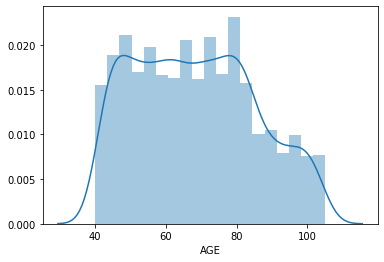

In [77]:
# visulatizing age distibution of customers
sns.distplot(customers_train.AGE)

In [78]:
print("Min: {}".format(customers_train.AGE.min()))
print("Max: {}".format(customers_train.AGE.max()))

Min: 40
Max: 105


Customers age vary between 40 and 105, I have no concerns about this column.

In [82]:
# check distribution of ACTIVE customers
customers_train.ACTIVE.unique()

array([1], dtype=int64)

All customers are active. We can't check if there are any inactive customers in test data, so best to exclude this information from predicting model. Even if customer have had a loan in the past, he/she could have exited the bank.

In [79]:
# checking how many districts are there, and if we characteristics for all of them in districts table. 
print("There are {} districts.".format(customers_train.DISTRICT_ID.unique().shape[0]))
customers_train.merge(districts, on='DISTRICT_ID').isna().sum()

There are 77 districts.


CLIENT_ID      0
ACCOUNT_ID     0
GENDER         0
BIRTH_DT       0
ACTIVE         0
LOAN           0
DISTRICT_ID    0
AGE            0
N_INHAB        0
N_CITIES       0
URBAN_RATIO    0
AVG_SALARY     0
UNEMP_95       0
UNEMP_96       0
N_ENTR         0
CRIME_95       0
CRIME_96       0
dtype: int64

We have descriptions about all districts inhabitated by banks' customers.
### Data quality checks for districts table


In [25]:
# check for missing values
districts.isna().sum()

DISTRICT_ID    0
N_INHAB        0
N_CITIES       0
URBAN_RATIO    0
AVG_SALARY     0
UNEMP_95       0
UNEMP_96       0
N_ENTR         0
CRIME_95       0
CRIME_96       0
dtype: int64

There are no missing values.

In [26]:
# print out columns names
districts.columns

Index(['DISTRICT_ID', 'N_INHAB', 'N_CITIES', 'URBAN_RATIO', 'AVG_SALARY',
       'UNEMP_95', 'UNEMP_96', 'N_ENTR', 'CRIME_95', 'CRIME_96'],
      dtype='object')

In [33]:
# check how many districts are described
districts.DISTRICT_ID.unique().shape[0]

77

If I had more time I would follow same strategy as with customers table and check each column individually for data quality. I will stop at checking for missing values, because I think it's worth to spend more time with transactions table.

### Data quality checks for transactions table

In [81]:
# check for missing values
transactions_train.isna().sum()

TRANS_ID           0
ACCOUNT_ID         0
DATE               0
AMOUNT             0
BALANCE            0
TYPE               0
OPERATION     144084
LOAN               0
dtype: int64

In [157]:
transactions_train.OPERATION.isna().sum() / transactions_train.shape[0]

0.1731657624358534

There are missing values in OPERATION, and it consists of 17% of data. It wouldn't be wise to drop this information, I will impute it with label "Other".

In [161]:
transactions_train.fillna("OTHER", inplace=True)

In [82]:
# check if TRANS_ID in unique
transactions_train.TRANS_ID.unique().shape[0] - transactions_train.shape[0]

-7826

In [83]:
# check if these duplicated TRANS_ID refer to entire duplicated row
transactions_train.duplicated().sum()

7826

Duplicates are possibly result of faulty data collection process, they make no business sense, thus I drop them from the table.

In [84]:
transactions_train.drop_duplicates(inplace=True)

In [96]:
# check format of DATE column and transform in datetime object
transactions_train.DATE.unique()

array([ 1011993, 22011993, 23011993, ..., 26021994, 23111994, 22041995],
      dtype=int64)

In [119]:
# check if dates have same number of characters
np.unique(np.array([len(str(x)) for x in transactions_train.DATE]))

array([7, 8])

In the date format day is not zero-padded. I will amend that in order to utilize strptime function to convert it into datetime object, for ease of visulization later.

In [147]:
transactions_train.columns

Index(['TRANS_ID', 'ACCOUNT_ID', 'DATE', 'AMOUNT', 'BALANCE', 'TYPE',
       'OPERATION'],
      dtype='object')

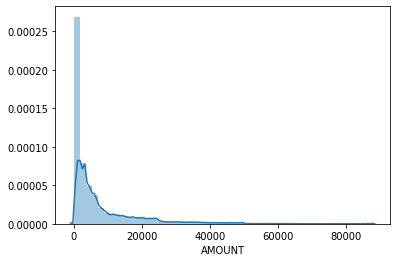

In [121]:
sns.distplot(transactions_train.AMOUNT)

In [125]:
transactions_train.AMOUNT.describe()

count    824101.000000
mean       5871.351246
std        9441.859261
min           0.000000
25%         135.700000
50%        2100.000000
75%        6700.000000
max       87400.000000
Name: AMOUNT, dtype: float64

In [126]:
transactions_train[transactions_train.AMOUNT == 0]

,TRANS_ID,ACCOUNT_ID,DATE,AMOUNT,BALANCE,TYPE,OPERATION
62117,3451866,5369.0,30061997,0.0,603.9,WITHDRAWAL,WITHDRAWAL_IN_CASH
96933,3452231,5483.0,31011995,0.0,113.1,WITHDRAWAL,WITHDRAWAL_IN_CASH
162248,3451376,5129.0,30111994,0.0,-388.7,WITHDRAWAL,WITHDRAWAL_IN_CASH
168335,3446795,1475.0,31011998,0.0,694.3,WITHDRAWAL,WITHDRAWAL_IN_CASH
260894,3456605,9337.0,31011997,0.0,8502.9,WITHDRAWAL,WITHDRAWAL_IN_CASH
260897,3510214,9337.0,31011997,0.0,8488.2,WITHDRAWAL,WITHDRAWAL_IN_CASH
315248,3455961,8957.0,31081994,0.0,72681.7,WITHDRAWAL,WITHDRAWAL_IN_CASH
603067,3456218,9051.0,28021998,0.0,1367.1,CREDIT,NaN
603070,3507085,9051.0,28021998,0.0,1367.1,CREDIT,NaN
656397,3449658,3859.0,31121997,0.0,197.0,WITHDRAWAL,WITHDRAWAL_IN_CASH


In [128]:
transactions_train[transactions_train.AMOUNT == 0].shape[0]

12

Transaction for 0 amount doesn't make sense. I will drop them from the sample since there is only 12 of them.

In [129]:
transactions_train = transactions_train[transactions_train.AMOUNT != 0]

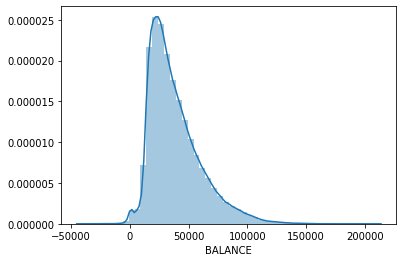

In [130]:
# checking BALANCE
sns.distplot(transactions_train.BALANCE)

In [134]:
transactions_train.describe()

,TRANS_ID,ACCOUNT_ID,DATE,AMOUNT,BALANCE
count,8.240890e+05,824089.000000,8.240890e+05,824089.000000,824089.000000
mean,1.343913e+06,2973.121606,1.840585e+07,5871.436742,38500.188372
std,1.230502e+06,2520.123063,1.019652e+07,9441.901422,21982.073852
min,1.000000e+00,1.000000,1.011993e+06,0.100000,-41125.700000
25%,4.312710e+05,1218.000000,9.091998e+06,135.800000,22466.000000
50%,8.653430e+05,2471.000000,1.506200e+07,2100.000000,33179.600000
75%,2.108242e+06,3674.000000,3.009200e+07,6700.000000,49531.200000
max,3.682987e+06,11382.000000,3.112200e+07,87400.000000,209637.000000


If I had more time, I coudld have checked in BALANCE column is calculated correctly, i.e. does it follow transactions.

In [148]:
# check 'TYPE'
transactions_train.TYPE.unique()

array(['CREDIT', 'WITHDRAWAL'], dtype=object)

In [162]:
# check 'OPERATION'
transactions_train.OPERATION.unique()

array(['CREDIT_IN_CASH', 'OTHER', 'WITHDRAWAL_IN_CASH',
       'REMITTANCE_TO_OTHER_BANK', 'COLLECTION_FROM_OTHER_BANK',
       'CC_WITHDRAWAL'], dtype=object)

In [164]:
# check if TYPE and OPERATION make sense, e.g. TYPE=CREDIT and OPERATION = WITHDRAWAL_IN_CASH would be an error.
transactions_train.groupby(['TYPE','OPERATION']).count()

TRANS_ID  ACCOUNT_ID    DATE  AMOUNT  \
TYPE       OPERATION                                                          
CREDIT     COLLECTION_FROM_OTHER_BANK     50597       50597   50597   50597   
           CREDIT_IN_CASH                122861      122861  122861  122861   
           OTHER                         142704      142704  142704  142704   
WITHDRAWAL CC_WITHDRAWAL                   6451        6451    6451    6451   
           REMITTANCE_TO_OTHER_BANK      162790      162790  162790  162790   
           WITHDRAWAL_IN_CASH            338686      338686  338686  338686   

                                       BALANCE  
TYPE       OPERATION                            
CREDIT     COLLECTION_FROM_OTHER_BANK    50597  
           CREDIT_IN_CASH               122861  
           OTHER                        142704  
WITHDRAWAL CC_WITHDRAWAL                  6451  
           REMITTANCE_TO_OTHER_BANK     162790  
           WITHDRAWAL_IN_CASH           338686

In [91]:
customers_train.groupby('DISTRICT_ID').count().sort_values(by='CLIENT_ID',ascending=False).head()

,CLIENT_ID,ACCOUNT_ID,GENDER,BIRTH_DT,ACTIVE,LOAN,BIRTH_DATE,AGE
DISTRICT_ID,,,,,,,,
1,442,442,442,442,442,434,442,442
74,115,115,115,115,115,115,115,115
54,107,107,107,107,107,106,107,107
70,105,105,105,105,105,102,105,105
64,80,80,80,80,80,77,80,80


In [171]:
#Saving resulted customers_train, transactions_train for further exploratory analysis.

customers_train.to_csv("data interim/customers_train.csv")
transactions_train.to_csv("data interim/transactions_train.csv")

In [172]:
customers_test.to_csv("data interim/customers_test.csv")
transactions_test.to_csv("data interim/transactions_test.csv")